In [5]:
import data

df, acc_times = data.get_data(year := 2021)

data.style_table(df)

,name,score,stars,1.1,1.2,2.1,2.2,3.1,3.2,4.1,4.2,5.1,5.2,6.1,6.2,7.1,7.2,8.1,8.2,9.1,9.2,10.1,10.2,11.1,11.2,12.1,12.2,13.1,13.2,14.1,14.2,15.1,15.2,16.1,16.2,17.1,17.2,18.1,18.2,19.1,19.2,20.1,20.2,21.1,21.2,22.1,22.2,23.1,23.2,24.1,24.2,accumulated_time
1,Andreu Vall Hernàndez,551,48,08:24:30,07:44,09:11:17,02:02,12:33:15,27:39,10:01:43,09:16,11:17:50,08:50,11:45:06,00:49,10:26:33,05:11,11:28:30,13:17,07:38:31,09:23,23:57:30,04:32,11:48:15,01:19,14:44:19,03:50,13:09:54,05:14,11:59:22,08:38,20:33:33,05:52,13:36:34,14:23,12:29:34,04:04,13:52:38,06:22,22:50:37,03:45,17:26:20,00:24,12:07:39,52:24,18:37:30,00:07,17:53:40,46:20,14:31:30,00:24,04:01:49
2,Arnau Q,641,46,08:56:48,02:38,08:17:02,03:07,09:44:49,30:14,10:07:12,11:57,09:28:56,20:05,10:00:58,01:09,09:24:05,12:21,06:12:42,28:07,09:46:46,26:16,09:13:23,08:46,10:29:37,13:23,10:08:44,11:21,09:53:16,04:13,10:01:50,00:16,09:52:28,01:29:00,10:52:26,46:03,10:00:13,07:15,00:35:49,04:07,16:28:25,12:39,10:46:37,00:19,08:50:21,52:31,11:03:13,01:46:56,14:49:38,01:26:12,NaT,NaT,NaT
3,sarabase,461,45,18:32:58,18:29,12:06:40,03:32,11:23:58,55:36,17:37:14,06:45,16:44:35,06:17,18:25:30,17:14,18:41:54,09:46,09:28:08,04:26:05,13:19:11,01:02:09,10:40:44,21:57,10:47:58,15:28,10:03:31,02:42,10:09:01,09:57,10:43:16,41:43,22:30:16,05:49,18:10:29,33:32,11:34:07,19:26,23:17:00,01:49,17:07:50,04:23,17:47:42,01:48,10:52:09,10:21:47,10:24:56,NaT,10:58:46,05:54:42,NaT,NaT,NaT
4,albertsalles4,507,44,10:22:07,08:49,09:21:50,02:31,10:10:11,15:24,11:54:16,12:10,10:26:11,09:42,17:42:11,00:36,11:31:50,01:30,10:51:04,02:25:43,10:38:20,39:42,10:00:35,08:49,10:36:57,04:14,12:21:11,09:35,17:48:23,03:11,11:50:47,00:12,16:47:44,18:25,13:20:37,11:26,12:13:34,06:39,19:37:44,03:55,17:03:16,03:27,14:07:30,00:33,18:31:53,52:40,15:50:32,00:29,NaT,NaT,NaT,NaT,NaT
5,Antonio Tigri,449,44,15:22:36,12:46,10:56:21,03:52,11:37:32,34:25,12:27:54,17:41,13:36:21,23:21,10:39:33,02:52:50,11:29:02,06:39,11:06:27,01:52:42,10:32:19,40:12,16:41:25,46:33,11:43:34,07:54,13:20:35,32:19,18:19:25,06:33,11:14:44,43:32,19:36:38,41:36,15:22:35,01:02:51,12:19:40,11:48,21:08:31,12:22,13:28:27,31:08,11:39:45,01:09:37,12:07:55,05:35:38,10:52:13,06:56:54,NaT,NaT,NaT,NaT,NaT
6,EstherRH00,430,43,13:11:40,42:39,21:05:03,03:25,13:39:55,23:11,13:20:28,16:00,13:01:04,20:08,13:01:53,12:41,09:00:56,04:20,16:00:53,01:34:06,12:48:03,24:55,13:38:41,09:26,13:46:27,07:58,14:04:09,30:48,16:00:22,01:10:32,09:59:26,40:54,13:25:20,13:53,20:43:47,10:05,13:50:05,04:21,14:32:49,09:30,12:18:44,00:19,15:03:30,01:39,10:42:56,02:02:11,13:26:12,NaT,NaT,NaT,NaT,NaT,NaT
7,David Rial Figols,451,36,10:36:31,08:55,09:31:31,02:43,07:09:12,36:45,16:58:57,06:52,11:25:20,23:36,09:46:03,01:03,07:56:03,11:20,10:37:55,02:51:13,08:41:46,55:33,09:00:43,08:42,10:32:24,02:30,11:44:00,38:33,09:48:16,15:15,07:42:14,01:13:35,17:22:01,35:28,11:10:20,16:30,12:19:11,04:43,10:58:28,05:54,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
8,enriquejiwa,419,36,12:32:01,39:37,10:01:28,10:00,10:19:35,43:50,11:00:48,15:45,11:49:26,09:26,11:19:36,09:17,11:01:16,10:13,11:12:41,01:00:49,11:28:06,11:46,11:16:46,09:56,12:09:34,03:36,10:19:24,06:54,11:58:40,07:59,09:40:05,16:39,10:49:24,16:54,12:51:27,06:22,10:17:08,13:55,11:51:55,04:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
9,Arnau Martínez Tomàs,348,36,23:53:14,45:12,10:23:49,25:47,12:59:36,30:52,11:25:20,12:41,12:45:06,23:25,10:57:01,25:47,11:28:53,04:25,16:38:14,02:24:19,09:25:57,27:20,21:29:22,13:25:28,12:02:19,03:36,14:07:33,02:47:58,12:51:09,09:53,13:25:23,06:14:09,15:43:01,04:10:46,12:11:17,14:50,16:45:59,01:25:45,18:22:18,24:29,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


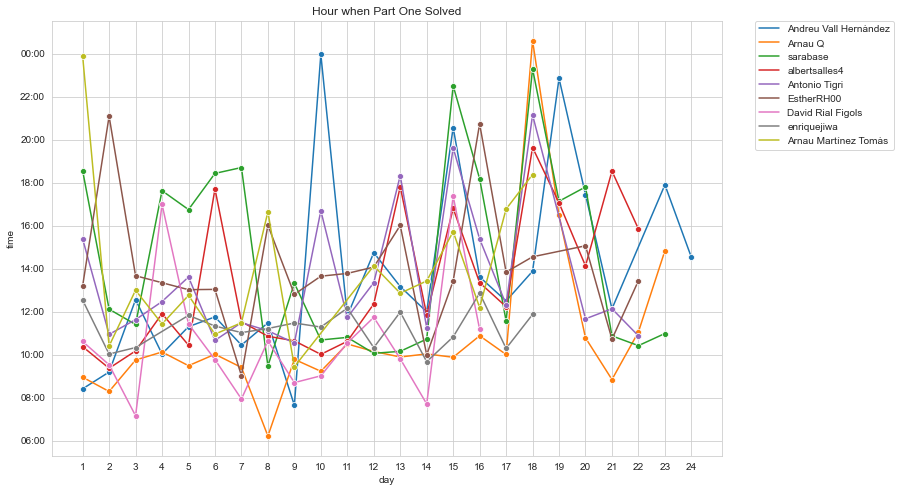

In [6]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as md
import seaborn as sns
import pandas as pd

days = int(df.columns[-2].split('.')[0])

n_days = int(df.columns[-2].split('.')[0])
too_far = datetime.strptime(f'2/12/{year} 06', '%d/%m/%Y %H')

times_data = []
for _, row in df.iterrows():
    for day in range(1, n_days+1):
        date = row[f'{day}.1']
        if not pd.isnull(date):
            time = date-pd.Timedelta(day-1, unit='d')
            if time < too_far:
                times_data.append({'name': row['name'], 'day': day, 'time': time})

times = pd.DataFrame(times_data)

plt.figure(figsize=(12,8))

ax = sns.lineplot(data=times, x='day', y='time', hue='name', marker='o')

sns.set_style("whitegrid")

ax.set_title('Hour when Part One Solved')

ax.set_xticks(range(1, days+1))
ax.yaxis.set_major_formatter(md.DateFormatter('%H:%M'))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.savefig('static_plots/part1.png', bbox_inches='tight')

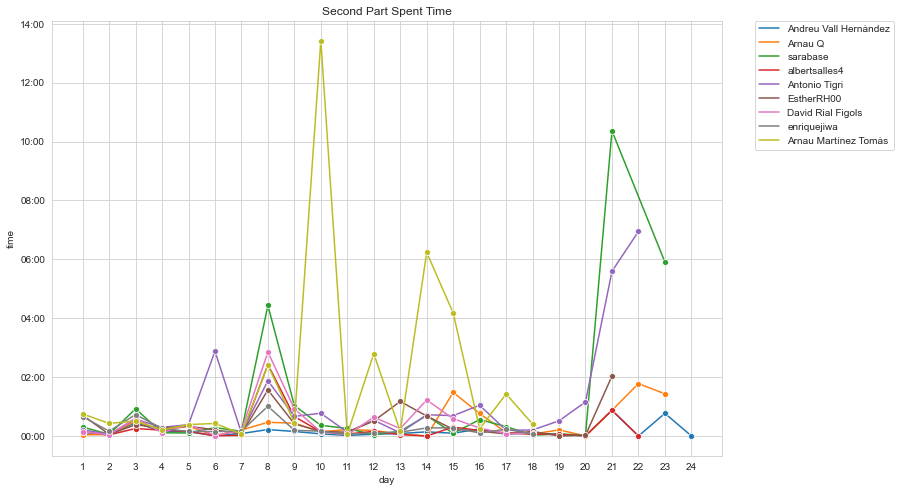

In [7]:
base = datetime.strptime('1/12/21', '%d/%m/%y')

times_data = []
for _, row in df.iterrows():
    for day in range(1, n_days+1):
        time = row[f'{day}.2']
        if not pd.isnull(time):
            times_data.append({'name': row['name'], 'day': day, 'time': time+base})

times = pd.DataFrame(times_data)

plt.figure(figsize=(12,8))

ax = sns.lineplot(data=times, x='day', y='time', hue='name', marker='o')

ax.set_xticks(range(1, days+1))
ax.yaxis.set_major_formatter(md.DateFormatter('%H:%M'))
ax.set_title('Second Part Spent Time')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.savefig('static_plots/part2.png', bbox_inches='tight')

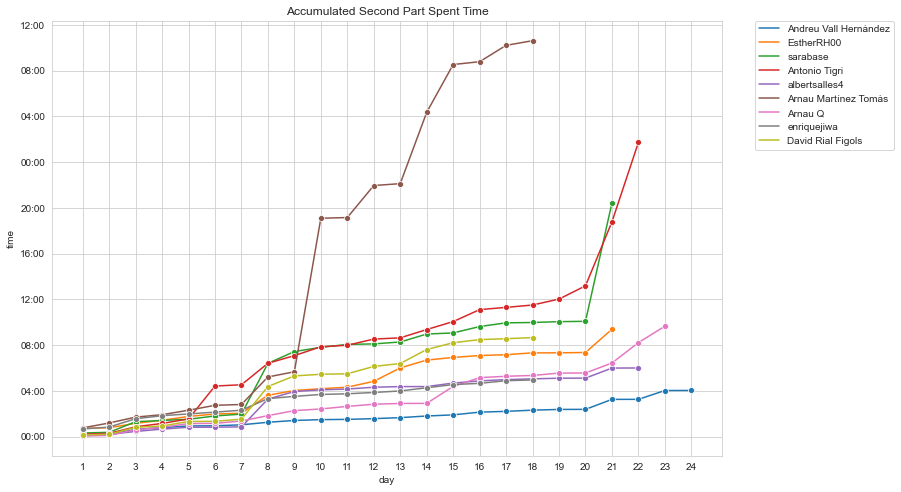

In [4]:
times_data = []
for _, row in acc_times.iterrows():
    for day in range(1, n_days+1):
        time = row[str(day)]
        if not pd.isnull(time):
            times_data.append({'name': row['name'], 'day': day, 'time': time+base})

times = pd.DataFrame(times_data)

plt.figure(figsize=(12,8))

ax = sns.lineplot(data=times, x='day', y='time', hue='name', marker='o')

ax.set_xticks(range(1, days+1))
ax.yaxis.set_major_formatter(md.DateFormatter('%H:%M'))
ax.set_title('Accumulated Second Part Spent Time')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.savefig('static_plots/part2_total.png', bbox_inches='tight')